In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import fitsio
from astropy.io          import fits
import SciServer
from SciServer import Authentication, LoginPortal, Config, CasJobs, SkyQuery, SciDrive, SkyServer, Files, Jobs

from astropy.coordinates import SkyCoord
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib
from matplotlib import cm

from astropy.table import Table

import healpy as hp
from tqdm.notebook import tqdm

In [2]:
filename = '/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_master_table.fit'
master = fitsio.read(filename, header=False)
master=pd.DataFrame.from_records(master.tolist(), columns=master.dtype.names)
master

,nside,hpix,ra_pix,dec_pix,ngals,filenames,lim_ref,ref_ind,area,nmag,mode,b,zeropoint,u_ind,g_ind,r_ind,i_ind,z_ind
0,32,"[391, 392, 393, 394, 443, 447, 448, 449, 450, ...","[176.78571428571428, 183.2142857142857, 189.64...","[69.4225464945822, 69.4225464945822, 69.422546...","[937, 2498, 2077, 362, 4461, 3885, 11436, 1454...","[dr8_galaxies_clean_v10_0000391.fit , dr8_ga...",21.2911,3,10401.5,5,SDSS,"[1.4e-10, 9e-11, 1.2e-10, 1.8e-10, 7.4e-10]",22.5,0,1,2,3,4


In [3]:
pixels=master.hpix[0]

In [4]:
i=0

fn="./pixelized_cat_pkl/cat"+str(pixels[i])+".pkl"
df=pd.read_pickle(fn).reset_index(drop=True)
df

,photoID,ra,dec,cmodelmag_i,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,extinction_u,clean,cmodelmagerr_i,modelmagerr_u,modelmagerr_g,modelmagerr_r,modelmagerr_i,modelmagerr_z,pixel
0,1237651274046242850,174.012534,68.063194,14.28234,23.41419,15.28278,15.34133,14.28855,25.73594,0.035784,0,0.003880,10.366800,0.004814,0.010868,0.003944,1.704407,391
1,1237651274046242852,173.998181,68.065237,19.83934,23.98670,22.13272,20.39374,19.85117,19.16328,0.035795,0,0.052672,1.301876,0.123375,0.040613,0.042416,0.074676,391
2,1237651274046242857,174.017521,68.071907,21.39781,24.58252,23.80814,22.24848,21.52618,22.87533,0.035637,1,0.341940,1.388563,0.459629,0.184550,0.165823,0.902869,391
3,1237651274046242872,174.067838,68.191575,20.92455,24.40649,23.05415,21.53417,21.00010,21.40970,0.039908,1,0.218288,1.377959,0.257993,0.104636,0.105035,0.484062,391
4,1237651274046242965,174.051092,68.111524,21.32714,24.34479,23.76479,21.09072,20.88309,21.54199,0.035128,0,0.199658,2.591468,0.900219,0.132884,0.182783,1.083560,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34062,1237671751899677274,179.994423,70.489035,21.66397,26.62594,23.92552,22.14718,21.40503,21.54934,0.069826,1,0.229641,0.433729,0.625926,0.189210,0.172653,0.605650,391
34063,1237671751899677305,179.991839,70.462643,21.66144,23.76384,23.43561,21.70806,21.35216,20.29374,0.071305,1,0.173490,1.165265,0.462163,0.134443,0.173989,0.220934,391
34064,1237671751899677387,179.934640,70.545384,20.54654,22.48988,23.47581,21.67796,20.54421,20.35927,0.069842,0,0.167970,0.831241,0.889487,0.259759,0.167380,0.483959,391
34065,1237671751899677414,179.997044,70.486132,21.55168,25.29015,25.12737,22.55082,21.55177,20.96700,0.069887,0,0.173255,1.088109,0.961535,0.235434,0.173255,0.322361,391


In [5]:
Ru=4.239
Rg=3.303
Rr=2.285
Ri=1.698
Rz=1.263

In [6]:
evb=df.extinction_u/Ru
df['extinction_g']=evb*Rg
df['extinction_r']=evb*Rr
df['extinction_i']=evb*Ri
df['extinction_z']=evb*Rz

In [7]:
#dereddening step
df.modelmag_u=df.modelmag_u-df.extinction_u
df.modelmag_g=df.modelmag_g-df.extinction_g
df.modelmag_r=df.modelmag_r-df.extinction_r
df.modelmag_i=df.modelmag_i-df.extinction_i
df.modelmag_z=df.modelmag_z-df.extinction_z
df.cmodelmag_i=df.cmodelmag_i-df.extinction_i

In [8]:
newmag=np.empty_like(df.ra, dtype=object)
newmagerr=np.empty_like(df.ra, dtype=object)
for i in range(len(df)):
    newmag[i]=[df.at[i,'modelmag_u'],df.at[i,'modelmag_g'], df.at[i,'modelmag_r'], df.at[i,'modelmag_i'], df.at[i,'modelmag_z']]
    newmagerr[i]=[df.at[i,'modelmagerr_u'],df.at[i,'modelmagerr_g'], df.at[i,'modelmagerr_r'], df.at[i,'modelmagerr_i'], df.at[i,'modelmagerr_z']]
df['newmag']=newmag
df['refmag']=df.cmodelmag_i
df['newmagerr']=newmagerr
df['refmagerr']=df.cmodelmagerr_i

In [9]:
filename = '/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_0000391.fit'
example = fitsio.read(filename, header=False)
example.dtype

dtype([('photoid', '>i8'), ('id', '>i4'), ('flagged', 'u1'), ('ra', '>f8'), ('dec', '>f8'), ('refmag', '>f4'), ('refmag_err', '>f4'), ('mag', '>f4', (5,)), ('mag_err', '>f4', (5,)), ('ebv', '>f4')])

In [10]:
filename = '/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_0000391.fit'
example = fitsio.read(filename, header=False)
example=pd.DataFrame.from_records(example.tolist(), columns=example.dtype.names)
example

,photoid,id,flagged,ra,dec,refmag,refmag_err,mag,mag_err,ebv
0,13500301603430522,2827009,0,174.184555,68.099529,20.932245,0.142867,"[26.369059, 23.49445, 21.910133, 21.021795, 20...","[0.5945581, 0.4316884, 0.16693631, 0.12081416,...",0.008156
1,13500301603430238,2826909,0,174.211675,68.096759,19.954874,0.076356,"[22.589613, 21.153236, 20.132578, 19.780222, 1...","[0.6671708, 0.07883752, 0.04964328, 0.05661554...",0.008058
2,13500301603430247,2826911,0,174.217475,68.116899,20.923120,0.200763,"[23.059347, 22.224876, 21.409758, 20.921545, 2...","[1.0075104, 0.20534404, 0.15620816, 0.1586948,...",0.007891
3,13500301603430249,2826912,0,174.225429,68.109362,20.572851,0.103156,"[23.470137, 22.09791, 21.25277, 20.756788, 20....","[1.003084, 0.13594612, 0.09831337, 0.10028103,...",0.007893
4,13500301603430250,2826913,0,174.228755,68.102321,20.504915,0.195893,"[24.557848, 22.156199, 21.443298, 21.43199, 21...","[1.6425902, 0.14157332, 0.11451941, 0.18103147...",0.007929
...,...,...,...,...,...,...,...,...,...,...
932,14120301601430655,3272247,0,174.604761,68.297809,20.574362,0.143147,"[23.255304, 22.011728, 21.264692, 21.161545, 2...","[0.9175419, 0.12240813, 0.09497386, 0.1434814,...",0.009963
933,14120301601430658,3272248,0,174.574428,68.375172,20.446882,0.065524,"[23.034159, 21.594473, 20.83559, 20.395296, 20...","[0.6017863, 0.06736038, 0.05161626, 0.05729741...",0.009604
934,14120301601430660,3272249,0,174.594335,68.334084,18.680483,0.028891,"[21.859379, 21.304615, 19.406258, 18.745342, 1...","[0.45488352, 0.1071732, 0.03167616, 0.02891025...",0.009754
935,14120301601430675,3272250,0,174.656509,68.248789,20.048321,0.039119,"[23.540682, 22.66201, 20.780554, 20.01272, 19....","[0.83124626, 0.16517508, 0.04625449, 0.0392076...",0.010482


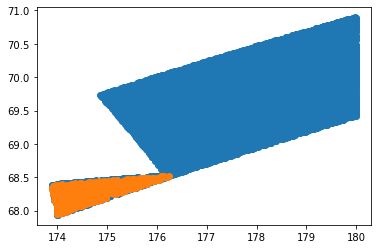

In [11]:
plt.scatter(df.ra,df.dec)
plt.scatter(example.ra,example.dec)

In [55]:
len(pixels)

3432

In [58]:
j=0
myngals=[]
myfn=[]

for i in range(len(pixels)):

    fn="./pixelized_cat_pkl/cat"+str(pixels[i])+".pkl"
    df=pd.read_pickle(fn).reset_index(drop=True)

    evb=df.extinction_u/Ru
    df['extinction_g']=evb*Rg
    df['extinction_r']=evb*Rr
    df['extinction_i']=evb*Ri
    df['extinction_z']=evb*Rz

    #dereddening step
    df.modelmag_u=df.modelmag_u-df.extinction_u
    df.modelmag_g=df.modelmag_g-df.extinction_g
    df.modelmag_r=df.modelmag_r-df.extinction_r
    df.modelmag_i=df.modelmag_i-df.extinction_i
    df.modelmag_z=df.modelmag_z-df.extinction_z
    df.cmodelmag_i=df.cmodelmag_i-df.extinction_i

    newdf3=np.zeros(len(df),dtype=[('photoid', '>i8'), ('id', '>i4'), ('flagged', 'u1'), ('ra', '>f8'), ('dec', '>f8'), ('refmag', '>f4'), ('refmag_err', '>f4'), ('mag', '>f4', (5,)), ('mag_err', '>f4', (5,)), ('ebv', '>f4')])
    
    for k in range(len(df)):
        toadd=np.array([df.at[k,'modelmag_u'],df.at[k,'modelmag_g'], df.at[k,'modelmag_r'], df.at[k,'modelmag_i'], df.at[k,'modelmag_z']]).reshape(-1,5)
        newdf3['mag'][k]=toadd
        toadd=np.array([df.at[k,'modelmagerr_u'],df.at[k,'modelmagerr_g'], df.at[k,'modelmagerr_r'], df.at[k,'modelmagerr_i'], df.at[k,'modelmagerr_z']]).reshape(-1,5)
        newdf3['mag_err'][k]=toadd
        
    #newdf = pd.DataFrame(columns = example.columns)

    newdf3['photoid']=df['photoID']
    newdf3['ebv']=evb
    newdf3['flagged']=df.clean
    newdf3['ra']=df['ra']
    newdf3['dec']=df['dec']
    newdf3['refmag']=df.cmodelmag_i
    newdf3['refmag_err']=df.cmodelmagerr_i
    #newdf['mag']=newmag.tolist()
    #newdf['mag_err']=newmagerr.tolist()

    ngals=len(newdf3)
    myngals=np.append(myngals,ngals)
    newdf3['id']=np.linspace(j,j+ngals-1,ngals).astype(int)

    j=j+ngals
    fn='dr16_galaxies_v1_'
    fn=fn+str(pixels[i]).zfill(7)+'.fit'
    
    directory='./pixelized_cat_fits/'
    print(directory+fn)
        
    t = Table(newdf3)
    t.write(directory+fn, overwrite=True)
    #fitsio.write(directory+fn, newdf.to_records(index=False), clobber=True, header=None, extname=None)
    
    #result_file = fitsio.FITS(directory+fn, 'rw')
    #result_file.write(newdf.to_records(index=False))
    #result_file.close()
    
    myfn=np.append(myfn,fn)

./pixelized_cat_fits/dr16_galaxies_v1_0000391.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000392.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000393.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000394.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000443.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000447.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000448.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000449.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000450.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000451.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000452.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000453.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000454.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000504.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000505.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000507.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000508.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000509.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000510.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000511.fit


./pixelized_cat_fits/dr16_galaxies_v1_0000967.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000968.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000969.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000970.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000971.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000972.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000973.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000974.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000975.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000976.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000977.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000978.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000979.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000980.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000981.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000982.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000983.fit
./pixelized_cat_fits/dr16_galaxies_v1_0000984.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001042.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001043.fit


./pixelized_cat_fits/dr16_galaxies_v1_0001369.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001370.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001371.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001372.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001373.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001438.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001439.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001440.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001441.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001442.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001443.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001444.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001445.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001446.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001447.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001448.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001449.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001450.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001451.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001452.fit


./pixelized_cat_fits/dr16_galaxies_v1_0001800.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001801.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001802.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001803.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001804.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001805.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001806.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001807.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001808.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001809.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001810.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001811.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001812.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001813.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001814.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001815.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001816.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001817.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001818.fit
./pixelized_cat_fits/dr16_galaxies_v1_0001819.fit


./pixelized_cat_fits/dr16_galaxies_v1_0002182.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002183.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002184.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002185.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002186.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002187.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002188.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002189.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002190.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002191.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002192.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002193.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002194.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002195.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002196.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002197.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002198.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002199.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002200.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002201.fit


./pixelized_cat_fits/dr16_galaxies_v1_0002548.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002549.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002550.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002551.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002552.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002553.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002554.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002555.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002556.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002557.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002558.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002559.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002560.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002561.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002562.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002563.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002564.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002565.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002566.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002567.fit


./pixelized_cat_fits/dr16_galaxies_v1_0002819.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002820.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002821.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002822.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002823.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002824.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002825.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002826.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002827.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002828.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002829.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002830.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002831.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002832.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002833.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002834.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002835.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002836.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002837.fit
./pixelized_cat_fits/dr16_galaxies_v1_0002838.fit


./pixelized_cat_fits/dr16_galaxies_v1_0003083.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003084.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003085.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003086.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003087.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003088.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003089.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003090.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003091.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003092.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003093.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003094.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003095.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003096.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003097.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003098.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003099.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003100.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003101.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003123.fit


./pixelized_cat_fits/dr16_galaxies_v1_0003343.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003344.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003345.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003346.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003347.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003348.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003349.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003350.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003351.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003352.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003353.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003354.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003355.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003356.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003357.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003379.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003380.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003381.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003382.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003383.fit


./pixelized_cat_fits/dr16_galaxies_v1_0003602.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003603.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003604.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003605.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003606.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003607.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003608.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003609.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003610.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003611.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003612.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003613.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003635.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003636.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003637.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003638.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003639.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003640.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003641.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003642.fit


./pixelized_cat_fits/dr16_galaxies_v1_0003865.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003866.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003867.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003868.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003892.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003893.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003894.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003895.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003896.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003897.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003898.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003899.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003900.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003901.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003902.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003903.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003904.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003905.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003906.fit
./pixelized_cat_fits/dr16_galaxies_v1_0003907.fit


./pixelized_cat_fits/dr16_galaxies_v1_0004156.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004157.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004158.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004159.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004160.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004161.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004162.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004163.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004164.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004165.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004166.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004167.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004168.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004169.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004170.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004171.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004200.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004201.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004202.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004203.fit


./pixelized_cat_fits/dr16_galaxies_v1_0004426.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004427.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004457.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004458.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004459.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004460.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004461.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004462.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004463.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004464.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004465.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004466.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004467.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004468.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004469.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004470.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004471.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004472.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004473.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004474.fit


./pixelized_cat_fits/dr16_galaxies_v1_0004729.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004730.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004731.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004732.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004733.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004734.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004735.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004736.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004737.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004738.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004739.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004740.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004741.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004742.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004743.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004744.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004745.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004746.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004747.fit
./pixelized_cat_fits/dr16_galaxies_v1_0004748.fit


KeyboardInterrupt: 

In [57]:
len(newdf3)

31703

In [53]:
filename = './pixelized_cat_fits/dr16_galaxies_v1_0000391.fit'
example = fitsio.read(filename, header=False)
example=pd.DataFrame.from_records(example.tolist(), columns=example.dtype.names)
example

,photoid,id,flagged,ra,dec,refmag,refmag_err,mag,mag_err,ebv
0,1237651274046242850,0,0,174.012534,68.063194,14.268006,0.003880,"[23.378407, 15.254897, 15.322041, 14.274216, 2...","[10.3668, 0.00481393, 0.01086771, 0.003944241,...",0.008442
1,1237651274046242852,1,0,173.998181,68.065237,19.825003,0.052672,"[23.950905, 22.10483, 20.374445, 19.836832, 19...","[1.301876, 0.1233749, 0.04061262, 0.04241619, ...",0.008444
2,1237651274046242857,2,1,174.017521,68.071907,21.383535,0.341940,"[24.546883, 23.780373, 22.22927, 21.511906, 22...","[1.388563, 0.4596294, 0.1845498, 0.1658226, 0....",0.008407
3,1237651274046242872,3,1,174.067838,68.191575,20.908564,0.218288,"[24.366581, 23.023054, 21.512657, 20.984114, 2...","[1.377959, 0.2579932, 0.1046355, 0.1050345, 0....",0.009415
4,1237651274046242965,4,0,174.051092,68.111524,21.313068,0.199658,"[24.309662, 23.73742, 21.071785, 20.869019, 21...","[2.591468, 0.9002193, 0.1328845, 0.1827834, 1....",0.008287
...,...,...,...,...,...,...,...,...,...,...
34062,1237671751899677274,34062,1,179.994423,70.489035,21.636000,0.229641,"[26.556114, 23.87111, 22.10954, 21.37706, 21.5...","[0.4337292, 0.6259263, 0.1892098, 0.1726528, 0...",0.016472
34063,1237671751899677305,34063,1,179.991839,70.462643,21.632877,0.173490,"[23.692535, 23.380049, 21.669624, 21.323597, 2...","[1.165265, 0.462163, 0.1344433, 0.1739888, 0.2...",0.016821
34064,1237671751899677387,34064,0,179.934640,70.545384,20.518564,0.167970,"[22.420038, 23.421389, 21.640312, 20.516233, 2...","[0.8312409, 0.8894874, 0.2597586, 0.1673805, 0...",0.016476
34065,1237671751899677414,34065,0,179.997044,70.486132,21.523685,0.173255,"[25.220263, 25.072914, 22.513147, 21.523775, 2...","[1.088109, 0.9615355, 0.2354344, 0.173255, 0.3...",0.016487


In [ ]:
filename = '/home/mr.bwolfe/myredmapper/pixelized_dr8_v10/dr8_galaxies_clean_v10_master_table.fit'
master = fitsio.read(filename, header=False)
mymaster=master
mymaster['ngals']=myngals
mymaster['filenames']=myfn